#  Recurrent Neural Network Excercise

In this exercise, you will learn how to build RNN, LSTM, and GRU models to classify images of handwritten digits from MNIST dataset.

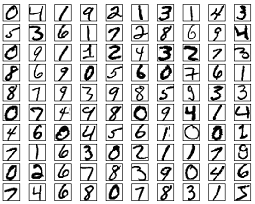

The MNIST dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 1. More information on the MNIST dataset can be found at: http://yann.lecun.com/exdb/mnist/

To classify images using a recurrent neural network, we consider every image row as a sequence of pixels. Because MNIST image shape is 28*28 pixels, we will then handle 28 sequences of 28 pixels for every MNIST image, as shown in the figure below.

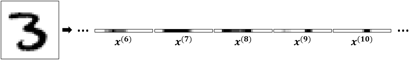

This exercise includes **4 parts**.


# Excercise Part 1: Basic RNN

In Excercise Part 1, perform the following steps.

1.1: Run the provided setup code.

1.2: Complete the code in 1.2 used to build basic RNN models and run. **The code in 1.2 will be graded**.

1.3: Run the provided code to configure the 1st basic RNN model. The size of its hidden states is set to 128.

1.4: Run the provided code to train the 1st basic RNN model.

1.5: Run the provided code to test the trained 1st basic RNN model.

1.6: Complete and run the code to configure the 2nd basic RNN model. You need to set the size of its hidden states to 64. **The code in 1.6 will be graded**.

1.7: Run the provided code to train the 2nd basic RNN model.

1.8: Run the provided code to test the trained 2nd basic RNN model.

1.9: Answer questions in 1.9.1, 1.9.2, and 1.9.3. **The answers in 1.9.1, 1.9.2, and 1.9.3 will be graded**.


STEP 1.1: SETUP CODE FOR EXCERCISE PART 1

In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import os
import numpy as np
import random
from matplotlib import pyplot as plt

# Define training parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128

# Define network parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_classes = 10 # MNIST total classes (0-9 digits)

# Import MNIST dataset from tensorflow_dataset (tfds).
# More information about tfds can be found on https://www.tensorflow.org/datasets/api_docs/python/tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=False, # True
    as_supervised=True,
    with_info=True,
)

# Function to transform train and test datasets
def transform(image, label):
  """Transform images: remove last dimension of size 1"""
  """Transform images: uint8 -> float32"""
  """Transform labels: indices -> one-hots"""
  return tf.cast(tf.squeeze(image, -1), tf.float32) / 255., tf.one_hot(label, 10)

# Pre-process train dataset
ds_train = ds_train.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache() #
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Pre-process test dataset
ds_test = ds_test.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\wintk\tensorflow_datasets\mnist\3.0.1.incompleteJOT6QW\mnist-train.tfrecord*...:   0%|     …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\wintk\tensorflow_datasets\mnist\3.0.1.incompleteJOT6QW\mnist-test.tfrecord*...:   0%|      …

Dataset mnist downloaded and prepared to C:\Users\wintk\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


STEP 1.2: COMPLETE CODE USED TO BUILD BASIC RNN MODELS

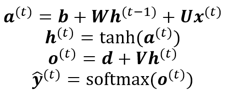

Fig. 1: Formulas for a basic RNN model

In [2]:
class RNN(keras.layers.Layer):
  def __init__(self, input_dim, hidden_dim, output_dim, batch_sz):
    super(RNN, self).__init__()
    init = tf.random_normal_initializer()

    self.b = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,1), dtype="float32"),
        trainable=True)

    self.W = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim), dtype="float32"),
        trainable=True)

    self.V = tf.Variable(
        initial_value=init(shape=(1,output_dim,hidden_dim), dtype="float32"),
        trainable=True)

    ################################################################################
    # TODO:                                                                        #
    # b, W, U, d, and V are model parameters.                                      #
    # The code to initialize b, W, and V is provided above.                     #
    # Please fill in the space indicated by ***** to initialize U and d as well.         #
    # Hint: You can infer the shapes of U and d from Fig. 1.          #
    ################################################################################
    self.U = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,input_dim), dtype="float32"),
        trainable=True)

    self.d = tf.Variable(
        initial_value=init(shape=(1,output_dim,1), dtype="float32"),
        trainable=True)
    ################################################################################
    #                              END OF YOUR CODE                                #
    ################################################################################

  def call(self, x, h_init, num_timestep):
    # Inputs:
    # x: [batch_sz,num_row,num_column]
    # h_init: [1,num_hidden,1]
    # num_timestep: int
    # Output:
    # y: [batch_sz,num_class], softmax normalized class probabilities

    h = h_init
    for ts in range(num_timestep):
      # curr_x: input sequence at the current timestep
      curr_x = tf.expand_dims(x[:,ts,:], -1) # [b,input_dim,1]
      ################################################################################
      # TODO:                                                                        #
      # Fill in the space indicated by ***** to implement the 1st and 2nd equations in Fig. 1 #
      # to compute activation a and hidden state h respectively.                                 #
      # You should use tf.math.tanh during implementing the 2nd equation. More information on tf.math.tanh can be found   #
      # at https://www.tensorflow.org/api_docs/python/tf/math/tanh                   #
      ################################################################################
      a = self.b + tf.linalg.matmul(self.W, h) + tf.linalg.matmul(self.U, curr_x)
      h = tf.math.tanh(a)
      ################################################################################
      #                              END OF YOUR CODE                                #
      ################################################################################

    y = self.d + tf.linalg.matmul(self.V, h)
    y =  tf.squeeze(y)
    y = tf.nn.softmax(y, axis=-1)

    return y

STEP 1.3: CONFIGURE THE 1ST BASIC RNN MODEL

Use the provided code to configure the 1st basic RNN model whose hidden states have the size of 128.

In [3]:
# Configure the 1st basic RNN model
basic_RNN1 = RNN(input_dim=num_input,
    hidden_dim=128,
    output_dim=num_classes,
    batch_sz=batch_size)

# Instantiate a tf.keras.Model for the 1st basic RNN model
# More information can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model
input_data = tf.keras.Input(shape=(timesteps, num_input), batch_size=batch_size,
    dtype=tf.float32)
h_init = 0 * tf.ones([1,128,1], tf.float32)
prediction_basic_RNN1 = basic_RNN1(input_data, h_init=h_init, num_timestep=timesteps)

model_basic_RNN1 = tf.keras.Model(input_data, prediction_basic_RNN1)
model_basic_RNN1.compile(optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

STEP 1.4: TRAIN THE 1ST BASIC RNN MODEL

You should expect to see training accuracy > or near 90%.

In [4]:
model_basic_RNN1.fit(ds_train, epochs=4)

Epoch 1/4
468/468 [==============================] - 20s 36ms/step - loss: 0.9171 - accuracy: 0.6988
Epoch 2/4
468/468 [==============================] - 19s 40ms/step - loss: 0.3591 - accuracy: 0.8960
Epoch 3/4
468/468 [==============================] - 19s 41ms/step - loss: 0.2665 - accuracy: 0.9247
Epoch 4/4
468/468 [==============================] - 20s 42ms/step - loss: 0.2225 - accuracy: 0.9365


STEP 1.5: TEST THE TRAINED 1ST BASIC RNN MODEL

You should expect to see testing accuracy > or near 90%.

In [5]:
# Test the trained 1st basic RNN model
h_init = 0 * tf.ones([1,128,1], tf.float32)

predicted_digits = []
gt_digits = []
for input_sequences, gt_digit in ds_test:
  predicted_digit = basic_RNN1(input_sequences, h_init=h_init, num_timestep=timesteps)

  # one-hot to index
  predicted_digits.append(np.squeeze(tf.argmax(predicted_digit, axis=-1).numpy()))
  gt_digits.append(np.squeeze(tf.argmax(gt_digit, axis=-1).numpy()))

predicted_digits = np.squeeze(np.concatenate(predicted_digits))
gt_digits = np.squeeze(np.concatenate(gt_digits))

test_accuracy = np.sum(predicted_digits == gt_digits) / np.shape(predicted_digits)[0]

print('Testing accuracy of the 1st basic RNN model: %f' % test_accuracy)

Testing accuracy of the 1st basic RNN model: 0.944700


STEP 1.6: CONFIGURE THE 2ND BASIC RNN MODEL

Complete the code to configure the 2nd basic RNN model whose hidden states have the size of 64.

In [6]:
# Configure the 2nd basic RNN model
################################################################################
# TODO:                                                                        #
# Fill in the space indicated by ***** to configure a basic RNN model where    #
# the size of hidden states is 64..                                            #
################################################################################
basic_RNN2 = RNN(input_dim=num_input,
      hidden_dim=64,
      output_dim=num_classes,
      batch_sz=batch_size)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

# Instantiate a tf.keras.Model for the 2nd basic RNN model
# More information can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model
input_data = tf.keras.Input(shape=(timesteps, num_input), batch_size=batch_size,
    dtype=tf.float32)
h_init = 0 * tf.ones([1,64,1], tf.float32)
prediction_basic_RNN2 = basic_RNN2(input_data, h_init=h_init, num_timestep=timesteps)

model_basic_RNN2 = tf.keras.Model(input_data, prediction_basic_RNN2)
model_basic_RNN2.compile(optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

STEP 1.7: TRAIN THE 2ND BASIC RNN MODEL

In [7]:
model_basic_RNN2.fit(ds_train, epochs=4)

Epoch 1/4
468/468 [==============================] - 8s 14ms/step - loss: 1.2485 - accuracy: 0.5601
Epoch 2/4
468/468 [==============================] - 6s 14ms/step - loss: 0.6403 - accuracy: 0.7909
Epoch 3/4
468/468 [==============================] - 6s 14ms/step - loss: 0.4751 - accuracy: 0.8575
Epoch 4/4
468/468 [==============================] - 7s 14ms/step - loss: 0.3912 - accuracy: 0.8856


STEP 1.8: TEST THE TRAINED 2ND BASIC RNN MODEL

In [8]:
# Test the trained 2nd basic RNN model
h_init = 0 * tf.ones([1,64,1], tf.float32)

predicted_digits = []
gt_digits = []
for input_sequences, gt_digit in ds_test:
  predicted_digit = basic_RNN2(input_sequences, h_init=h_init, num_timestep=timesteps)

  # one-hot to index
  predicted_digits.append(np.squeeze(tf.argmax(predicted_digit, axis=-1).numpy()))
  gt_digits.append(np.squeeze(tf.argmax(gt_digit, axis=-1).numpy()))

predicted_digits = np.squeeze(np.concatenate(predicted_digits))
gt_digits = np.squeeze(np.concatenate(gt_digits))

test_accuracy = np.sum(predicted_digits == gt_digits) / np.shape(predicted_digits)[0]

print('Testing accuracy of the 2nd basic RNN model: %f' % test_accuracy)

Testing accuracy of the 2nd basic RNN model: 0.903200


STEP 1.9: ANSWER THE QUESTIONS BELOW

1.9.1: During trainig, we set initial hidden state (h_init) to all zeros for both models. During testing, we also set initial hidden state (h_init) to all zeros for both models. If we set h_init to all 1000s during testing, can we get similar accuracies as before? Complete and run the code below to find out.

Report testing accuracies with h_init set to all zeros and all 1000s and give a possible explanation for the accuracy difference.

In addition, can you think of two different ways to set initial hidden state during training and testing?

In [9]:
# Test the trained basic RNN models with h_init set to all 1000s
################################################################################
# TODO:                                                                        #
# Fill in the space indicated by ***** to set h_init_RNN1 and h_init_RNN2 to   #
# all 1000s.                                                                   #
################################################################################
h_init_RNN1 = 1000 * tf.ones([1,128,1], tf.float32)
h_init_RNN2 = 1000 * tf.ones([1,64,1], tf.float32)
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

predicted_digits_RNN1 = []
predicted_digits_RNN2 = []
gt_digits = []
for input_sequences, gt_digit in ds_test:
  predicted_digit_RNN1 = basic_RNN1(input_sequences, h_init=h_init_RNN1, num_timestep=timesteps)
  predicted_digit_RNN2 = basic_RNN2(input_sequences, h_init=h_init_RNN2, num_timestep=timesteps)

  # one-hot to index
  predicted_digits_RNN1.append(np.squeeze(tf.argmax(predicted_digit_RNN1, axis=-1).numpy()))
  predicted_digits_RNN2.append(np.squeeze(tf.argmax(predicted_digit_RNN2, axis=-1).numpy()))

  gt_digits.append(np.squeeze(tf.argmax(gt_digit, axis=-1).numpy()))

predicted_digits_RNN1 = np.squeeze(np.concatenate(predicted_digits_RNN1))
predicted_digits_RNN2 = np.squeeze(np.concatenate(predicted_digits_RNN2))
gt_digits = np.squeeze(np.concatenate(gt_digits))

test_accuracy_RNN1 = np.sum(predicted_digits_RNN1 == gt_digits) / np.shape(predicted_digits_RNN1)[0]
test_accuracy_RNN2 = np.sum(predicted_digits_RNN2 == gt_digits) / np.shape(predicted_digits_RNN2)[0]

print('Testing accuracy of the 1st basic RNN model with h_init set to all 1000s: %f' % test_accuracy_RNN1)
print('Testing accuracy of the 2nd basic RNN model with h_init set to all 1000s: %f' % test_accuracy_RNN2)

Testing accuracy of the 1st basic RNN model with h_init set to all 1000s: 0.420500
Testing accuracy of the 2nd basic RNN model with h_init set to all 1000s: 0.273700


Your Answer:
1. Random normal initialization
2. Kaiming initialization

1.9.2: Run the code below to print summaries of the 2 basic RNN models. Based on printed summaries, how many trainable parameters are there? Which model has more trainable parameters and why?

More details can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model

In [10]:
model_basic_RNN1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(128, 28, 28)]           0         
                                                                 
 rnn (RNN)                   (128, 10)                 21386     
                                                                 
Total params: 21,386
Trainable params: 21,386
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_basic_RNN2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(128, 28, 28)]           0         
                                                                 
 rnn_1 (RNN)                 (128, 10)                 6602      
                                                                 
Total params: 6,602
Trainable params: 6,602
Non-trainable params: 0
_________________________________________________________________


Your Answer: The first model has 21386 trainable parameters, which is more than the 6602 trainable parameters for the second model. This is because the first model has a larger hidden dimension size of 128 compared to 64 in the second model.

Calculation for model 1: 128 + (128x128) + (128x28) + 10 + (128x10) = 21386

Calculation for model 2: 64 + (64x64) + (64x28) + 10 + (64x10) = 6602

1.9.3: We have trained 2 basic RNN models whose hidden states have the size of 128 and 64 respectively. Which model has a higher testing accuracy? What is the possible cause for the performance difference?

Your Answer:
The first model with hidden state size of 128 has a higher testing accuracy of 94.5% compared to 90.3% for the second model. More trainable parameters (21386) compared to the second model (6602) likely meant a greater capacity to learn patterns in the data, leading to a better performance.

# Excercise Part 2: LSTM

In Excercise Part 2, perform the following steps.

2.1: Reset runtime to clear past variables and functions.

2.2: Run the provided setup code.

2.3: Complete and run the code used to build LSTM models. **The code in 2.3 will be graded**.

2.4: Run the provided code to configure the LSTM model.

2.5: Run the provided code to train the LSTM model.

2.6: Run the provided code to test the trained LSTM model.

2.7: Use the provided code to visualize prediction of a randomly sampled test image.

2.8: Answer questions in 2.8.1 and 2.8.2. **The answers in 2.8.1 and 2.8.2 will be graded**.

STEP 2.1: RESET RUNTIME

Variables and functions of Excercise Part 1 are still saved in virtual machines.

It is a good practice to clear no longer needed past variables and functions in Colab notebook by resetting runtime such that virtual machines can return to original state.

To do so, select "Factory reset runtime" from "Runtime" drop down menu, as shown below.

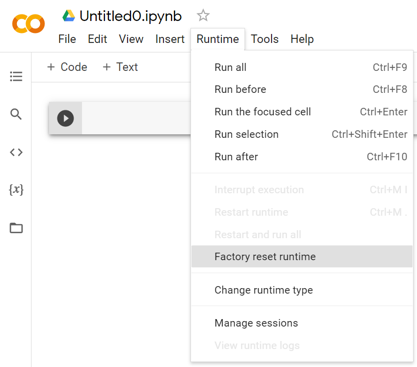

STEP 2.2: SETUP CODE FOR EXCERCISE PART 2

In [12]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import os
import numpy as np
import random
from matplotlib import pyplot as plt

# Define training parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128

# Define network parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_classes = 10 # MNIST total classes (0-9 digits)

# Import MNIST dataset from tensorflow_dataset (tfds). More information about tfds can be found on https://www.tensorflow.org/datasets/api_docs/python/tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=False, # True
    as_supervised=True,
    with_info=True,
)

# Function to transform train and test datasets
def transform(image, label):
  """Transform images: remove last dimension of size 1"""
  """Transform images: uint8 -> float32"""
  """Transform labels: indices -> one-hots"""
  return tf.cast(tf.squeeze(image, -1), tf.float32) / 255., tf.one_hot(label, 10)

# Pre-process train dataset
ds_train = ds_train.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache() #
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Pre-process test dataset
ds_test = ds_test.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128, drop_remainder=True)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

STEP 2.3: COMPLETE CODE USED TO BUILD LSTM MODELS

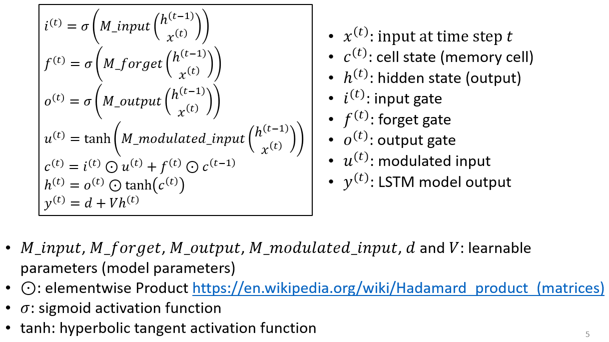

Fig. 2: Formulas for a LSTM model

In [13]:
class Long_short_term_memory(keras.layers.Layer):
  def __init__(self, input_dim, hidden_dim, output_dim, batch_sz):
    super(Long_short_term_memory, self).__init__()
    init = tf.random_normal_initializer()

    self.M_input = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim+input_dim), dtype="float32"),
        trainable=True)
    self.M_forget = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim+input_dim), dtype="float32"),
        trainable=True)
    self.M_output = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim+input_dim), dtype="float32"),
        trainable=True)
    self.M_modulated_input = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim+input_dim), dtype="float32"),
        trainable=True)

    self.d = tf.Variable(
        initial_value=init(shape=(1,output_dim,1), dtype="float32"),
        trainable=True)
    self.V = tf.Variable(
        initial_value=init(shape=(1,output_dim,hidden_dim), dtype="float32"),
        trainable=True)

  def call(self, x, h_init, c_init, num_timestep):
    # Inputs:
    # x: [batch_sz,num_row,num_column]
    # h_init: [1,num_hidden,1]
    # c_init: [1,num_hidden,1]
    # num_timestep: int
    # Output:
    # y: [batch_sz,num_class], softmax normalized class probabilities

    h = h_init # [b,h,1]
    c = c_init # [b,h,1]
    for ts in range(num_timestep):
      # curr_x: input sequence at the current timestep
      curr_x = tf.expand_dims(x[:,ts,:], -1) # [b,28,1]
      curr_hx = tf.concat((h,curr_x), 1) # [b,h+28,1]

      i = tf.linalg.matmul(self.M_input, curr_hx)
      o = tf.linalg.matmul(self.M_output, curr_hx)
      ################################################################################
      # TODO:                                                                        #
      # The codes to compute input_gate i and output_date o are      #
      # provided. Complete the space indicated by ***** to compute forget_gate f and modulated input u #
      # before activation, as shown in the 2nd and 4th equations in Fig. 2.           #
      # You should use tf.linalg.matmul. More information on tf.linalg.matmul can be #
      # found at https://www.tensorflow.org/api_docs/python/tf/linalg/matmul         #
      ################################################################################
      f = tf.linalg.matmul(self.M_forget, curr_hx)
      u = tf.math.tanh( tf.linalg.matmul(self.M_modulated_input, curr_hx) )
      ################################################################################
      #                              END OF YOUR CODE                                #
      ################################################################################
      i = tf.math.sigmoid(i)
      f = tf.math.sigmoid(f)
      o = tf.math.sigmoid(o)
      u = tf.math.tanh(u)

      c = i * u + f * c
      h = o * tf.math.tanh(c)

    y = self.d + tf.linalg.matmul(self.V, h)
    y =  tf.squeeze(y)
    y = tf.nn.softmax(y, axis=-1) # Convert to probabilities

    return y

STEP 2.4: CONFIGURE THE LSTM MODEL

Use the provided code to configure the LSTM model whose hidden states have the size of 128.

In [14]:
# Configure the LSTM model
LSTM = Long_short_term_memory(input_dim=num_input,
    hidden_dim=128,
    output_dim=num_classes,
    batch_sz=batch_size)

# Instantiate a tf.keras.Model for the LSTM model
# More information can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model
input_data = tf.keras.Input(shape=(timesteps, num_input), batch_size=batch_size,
    dtype=tf.float32)
h_init = tf.zeros([batch_size,128,1], tf.float32)
c_init = tf.zeros([batch_size,128,1], tf.float32)
prediction_LSTM = LSTM(input_data, h_init=h_init, c_init=c_init, num_timestep=timesteps)

model_LSTM = tf.keras.Model(input_data, prediction_LSTM)
model_LSTM.compile(optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

STEP 2.5: TRAIN THE LSTM MODEL

You should expect to see training accuracy > 90%.

In [15]:
model_LSTM.fit(ds_train, epochs=4)

Epoch 1/4
468/468 [==============================] - 60s 121ms/step - loss: 0.6734 - accuracy: 0.7790
Epoch 2/4
468/468 [==============================] - 59s 127ms/step - loss: 0.2025 - accuracy: 0.9397
Epoch 3/4
468/468 [==============================] - 60s 129ms/step - loss: 0.1395 - accuracy: 0.9591
Epoch 4/4
468/468 [==============================] - 67s 144ms/step - loss: 0.1069 - accuracy: 0.9685


STEP 2.6: TEST THE TRAINED LSTM MODEL

You should expect to see testing accuracy > 90%.

In [16]:
# Test the trained LSTM model
h_init = tf.zeros([batch_size,128,1], tf.float32)
c_init = tf.zeros([batch_size,128,1], tf.float32)

predicted_digits = []
gt_digits = []
for input_sequences, gt_digit in ds_test:
  predicted_digit = LSTM(input_sequences, h_init=h_init, c_init=c_init, num_timestep=timesteps)

  # one-hot to index
  predicted_digits.append(np.squeeze(tf.argmax(predicted_digit, axis=-1).numpy()))
  gt_digits.append(np.squeeze(tf.argmax(gt_digit, axis=-1).numpy()))

predicted_digits = np.squeeze(np.concatenate(predicted_digits))
gt_digits = np.squeeze(np.concatenate(gt_digits))

test_accuracy = np.sum(predicted_digits == gt_digits) / np.shape(predicted_digits)[0]

print('Testing accuracy of the LSTM model: %f' % test_accuracy)

Testing accuracy of the LSTM model: 0.970853


STEP 2.7: VISUALIZE TEST RESULT

Use the provided code to show the LSTM model prediction of a randomly sampled test image. You can run the code in this step a couple more times to test more images.

Ground-truth digit 1. Predicted digit 7 (LSTM)


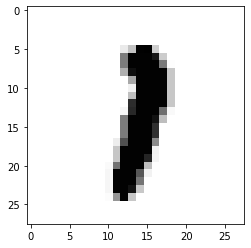

In [17]:
# Randomly select a test image
ds_test_list = list(ds_test)

test_indx = (random.randrange(0, len(ds_test_list)-1), random.randrange(0, batch_size-1))
test_batch = ds_test_list[test_indx[0]]
test_input = test_batch[0][test_indx[1],:] # Test image
test_gt = test_batch[1][test_indx[1],:] # Ground-truth class probabilities

# Use the trained LSTM model to obtain probabilities for each digit (0-9)
LSTM_pred = LSTM(tf.expand_dims(test_input, axis=0),
    h_init=tf.zeros([1,128,1], tf.float32),
    c_init=tf.zeros([1,128,1], tf.float32),
    num_timestep=timesteps) # numpy array

# Plot LSTM prediction
gt_digit = np.argmax(np.squeeze(test_gt.numpy()))
pred_digit_LSTM = np.argmax(np.squeeze(LSTM_pred))

plt.imshow(test_input.numpy(), cmap=plt.get_cmap('Greys'))
print('Ground-truth digit %d. Predicted digit %d (LSTM)' % (gt_digit, pred_digit_LSTM))
plt.show()

STEP 2.8: ANSWER THE QUESTIONS BELOW

2.8.1: As can be seen, basic RNN and LSTM models with the same hidden state size (128) achieve similar test accuracies at classifying MNIST handwritten digits. In what kind of scenario will LSTM significantly outperform basic RNN? Why is this the case?

Your Answer:
LSTM will significantly outperform RNN at longer timesteps. This is because LSTM is better than RNN at capturing long term dependencies, and encounters less issues with vanishing gradients. This is achieved with gated channels which determine the importance of available information (namely the input, the memory, and the hidden state) in making predictions, as well as elementwise multiplication which facilitates gradient flow during backpropagation through time.

2.8.2: How many trainable parameters are there in the LSTM model?

Hint: You may want to utilize the summary method, as in step 1.9.2.

Compared with the 1st basic RNN model with hidden states of the same size (128), there should be more trainable parameters in the LSTM model.

In [18]:
# If needed, you can complete and run the code below. Space to be completed is indicated by *****.

################################################################################
#                             START OF YOUR CODE                               #
################################################################################
model_LSTM.summary()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(128, 28, 28)]           0         
                                                                 
 long_short_term_memory (Lon  (128, 10)                81162     
 g_short_term_memory)                                            
                                                                 
Total params: 81,162
Trainable params: 81,162
Non-trainable params: 0
_________________________________________________________________


Your Answer: The LSTM model has 81162 trainable parameters.

# Excercise Part 3: GRU

In Excercise Part 3, perform the following steps.

3.1 Reset runtime.

3.2: Run the provided setup code.

3.3: Complete and run the code used to build GRU models. **The code in 3.3 will be graded**.

3.4: Run the provided code to configure the GRU model.

3.5: Run the provided code to train the GRU model.

3.6: Run the provided code to test the trained GRU model.

3.7: Answer the question in 3.7.1. **The answers in 3.7.1 will be graded**.

STEP 3.1: RESET RUNTIME

Variables and functions of Excercise Part 2 are still saved in virtual machines.

It is a good practice to clear no longer needed past variables and functions in Colab notebook by resetting runtime such that virtual machines can return to original state.

To do so, select "Factory reset runtime" from "Runtime" drop down menu, as shown below.

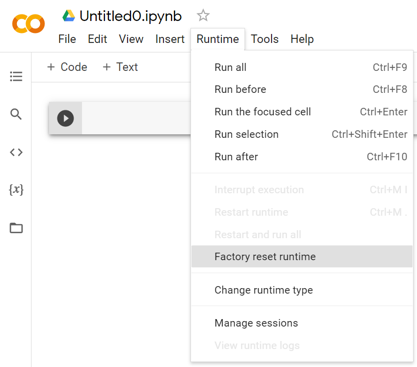



STEP 3.2: SETUP CODE FOR EXCERCISE PART 3

In [19]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import os
import numpy as np
import random
from matplotlib import pyplot as plt

# Define training parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128

# Define network parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_classes = 10 # MNIST total classes (0-9 digits)

# Import MNIST dataset from tensorflow_dataset (tfds).
# More information about tfds can be found on https://www.tensorflow.org/datasets/api_docs/python/tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=False, # True
    as_supervised=True,
    with_info=True,
)

# Function to transform train and test datasets
def transform(image, label):
  """Transform images: remove last dimension of size 1"""
  """Transform images: uint8 -> float32"""
  """Transform labels: indices -> one-hots"""
  return tf.cast(tf.squeeze(image, -1), tf.float32) / 255., tf.one_hot(label, 10)

# Pre-process train dataset
ds_train = ds_train.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache() #
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Pre-process test dataset
ds_test = ds_test.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128, drop_remainder=True)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

STEP 3.3: COMPLETE CODE USED TO BUILD GRU MODELS

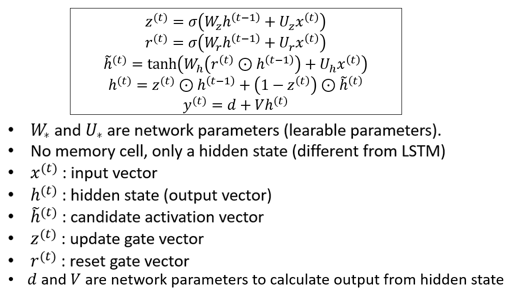

Fig. 3: Formulas for a GRU model

In [20]:
class Gated_recurrent_unit(keras.layers.Layer):
  def __init__(self, input_dim, hidden_dim, output_dim, batch_sz):
    super(Gated_recurrent_unit, self).__init__()
    init = tf.random_normal_initializer()

    self.W_z = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim), dtype="float32"),
        trainable=True)
    self.U_z = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,input_dim), dtype="float32"),
        trainable=True)

    ################################################################################
    # TODO:                                                                        #
    # The code to initialize W_z and U_z is provided.                              #
    # Complete the space indicated by ***** to initialize W_r, U_r, W_h, and U_h.  #
    # More info on TensorFlow variables can be found at:                           #
    # https://www.tensorflow.org/api_docs/python/tf/Variable                       #
    ################################################################################
    self.W_r = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim), dtype="float32"),
        trainable=True)
    self.U_r = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,input_dim), dtype="float32"),
        trainable=True)

    self.W_h = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim), dtype="float32"),
        trainable=True)
    self.U_h = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,input_dim), dtype="float32"),
        trainable=True)
    ################################################################################
    #                              END OF YOUR CODE                                #
    ################################################################################
    self.d = tf.Variable(
        initial_value=init(shape=(1,output_dim,1), dtype="float32"),
        trainable=True)
    self.V = tf.Variable(
        initial_value=init(shape=(1,output_dim,hidden_dim), dtype="float32"),
        trainable=True)

  def call(self, x, h_init, num_timestep):
    # Inputs:
    # x: [batch_sz,num_row,num_column]
    # h_init: [1,num_hidden,1]
    # num_timestep: int
    # Output:
    # y: [batch_sz,num_class], softmax normalized class probabilities

    h = h_init # [b,h,1]
    for ts in range(num_timestep):
      # curr_x: input sequence at the current timestep
      curr_x = tf.expand_dims(x[:,ts,:], -1) # [b,28,1]

      ################################################################################
      # TODO:                                                                        #
      # Complete the space indicated by ***** to perform forward propagation of the  #
      # GRU model. You should follow the equations in Fig. 3.                        #
      # 1: Compute update_gate z, reset_gate r, and candidate_activation h_tilde.    #
      # You should use tf.linalg.matmul, tf.math.sigmoid, and tf.math.tanh.          #
      # More information on tf.linalg.matmul can be found at                         #
      # https://www.tensorflow.org/api_docs/python/tf/linalg/matmul                  #
      # More information on tf.math.sigmoid can be found at                          #
      # https://www.tensorflow.org/api_docs/python/tf/math/sigmoid                   #
      # More information on tf.math.tanh can be found at                             #
      # https://www.tensorflow.org/api_docs/python/tf/math/tanh                      #
      # 2: Compute hidden state h from update_gate z, reset_gate r, and candidate_   #
      # activation h_tilde.                                                          #
      ################################################################################
      z = tf.math.sigmoid(tf.linalg.matmul(self.W_z, h) + tf.linalg.matmul(self.U_z, 
                                                                           curr_x))
      r = tf.math.sigmoid(tf.linalg.matmul(self.W_r, h) + tf.linalg.matmul(self.U_r, 
                                                                           curr_x))
      h_tilde = tf.math.tanh(tf.linalg.matmul(self.W_h, tf.math.multiply(r, h)) + \
                             tf.linalg.matmul(self.U_h, curr_x))

      h = tf.math.multiply(z, h) + tf.math.multiply((1-z), h_tilde)
      ################################################################################
      #                              END OF YOUR CODE                                #
      ################################################################################

    y = self.d + tf.linalg.matmul(self.V, h)
    y =  tf.squeeze(y)
    y = tf.nn.softmax(y, axis=-1)
    return y

STEP 3.4: CONFIGURE THE GRU MODEL

Use the provided code to configure the GRU model whose hidden states have the size of 128.

In [21]:
# Configure the GRU model
GRU = Gated_recurrent_unit(input_dim=num_input,
    hidden_dim=128,
    output_dim=num_classes,
    batch_sz=batch_size)

# Instantiate a tf.keras.Model for the GRU model
# More information can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model
input_data = tf.keras.Input(shape=(timesteps, num_input), batch_size=batch_size,
    dtype=tf.float32)
h_init = tf.zeros([batch_size,128,1], tf.float32)
prediction_GRU = GRU(input_data, h_init=h_init, num_timestep=timesteps)

model_GRU = tf.keras.Model(input_data, prediction_GRU)
model_GRU.compile(optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

STEP 3.5: TRAIN THE GRU MODEL

You should expect to see training accuracy > 90%.

In [22]:
model_GRU.fit(ds_train, epochs=4)

Epoch 1/4
468/468 [==============================] - 54s 107ms/step - loss: 0.7639 - accuracy: 0.7451
Epoch 2/4
468/468 [==============================] - 52s 111ms/step - loss: 0.2291 - accuracy: 0.9329
Epoch 3/4
468/468 [==============================] - 53s 114ms/step - loss: 0.1435 - accuracy: 0.9580
Epoch 4/4
468/468 [==============================] - 58s 124ms/step - loss: 0.1069 - accuracy: 0.9678


STEP 3.6: TEST THE TRAINED GRU MODEL

You should expect to see testing accuracy > 90%.

In [23]:
# Test the trained GRU model
h_init = tf.zeros([batch_size,128,1], tf.float32)

predicted_digits = []
gt_digits = []
for input_sequences, gt_digit in ds_test:
  predicted_digit = GRU(input_sequences, h_init=h_init, num_timestep=timesteps)

  # one-hot to index
  predicted_digits.append(np.squeeze(tf.argmax(predicted_digit, axis=-1).numpy()))
  gt_digits.append(np.squeeze(tf.argmax(gt_digit, axis=-1).numpy()))

predicted_digits = np.squeeze(np.concatenate(predicted_digits))
gt_digits = np.squeeze(np.concatenate(gt_digits))

test_accuracy = np.sum(predicted_digits == gt_digits) / np.shape(predicted_digits)[0]

print('Testing accuracy of the GRU model: %f' % test_accuracy)

Testing accuracy of the GRU model: 0.972756


STEP 3.7: ANSWER THE QUESTION BELOW

3.7.1: How many trainable parameters are there in the GRU model?

Hint: You may want to utilize the summary method of tf.keras.Model object, as in step 1.9.2 and 2.8.2. More details can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model

Compared with the 1st basic RNN model, there should be more trainable parameters. Compared with the LSTM model, there should be less trainable parameters.

In [24]:
# If needed, you can complete and run the code below. Space to be completed is indicated by *****.

################################################################################
#                             START OF YOUR CODE                               #
################################################################################
model_GRU.summary()
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(128, 28, 28)]           0         
                                                                 
 gated_recurrent_unit (Gated  (128, 10)                61194     
 _recurrent_unit)                                                
                                                                 
Total params: 61,194
Trainable params: 61,194
Non-trainable params: 0
_________________________________________________________________


Your Answer: The GRU model has 61194 trainable parameters.

# Excercise Part 4: Column Basic RNN

Just like in Excercise Part 1, you will also use a basic RNN model to classify MNIST handwritten digits. **However, instead of using rows of image as input at respective time steps, you will use columns of image, as shown in the figure below.** We call this model column basic RNN model. Can it achieve a similar testing accuracy? Follow the steps below to find out.

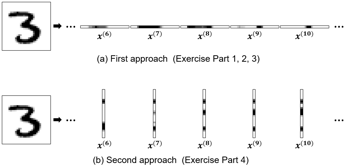

4.1: Reset runtime.

4.2: Run the provided setup code.

4.3: Copy the completed code from step 1.2. **This step will not work if code in step 1.2 has not been completed correctly.** Modify the lines as instructed below and run.

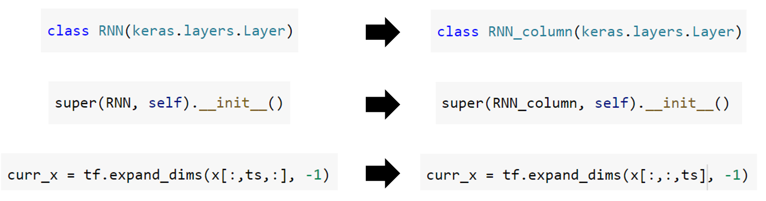

4.4: Run the provided code to configure the column basic RNN model. The size of hidden states is set to 128.

4.5: Run the provided code to train the column basic RNN model.

4.6: Run the provided code to test the trained column basic RNN model

4.7: Answer questions in 4.7.1. **The answers in 4.7.1 will be graded**.

STEP 4.1: RESET RUNTIME

Variables and functions of Excercise Part 3 are still saved in virtual machines.

It is a good practice to clear no longer needed past variables and functions in Colab notebook by resetting runtime such that virtual machines can return to original state.。

To do so, select "Factory reset runtime" from "Runtime" drop down menu, as shown below.

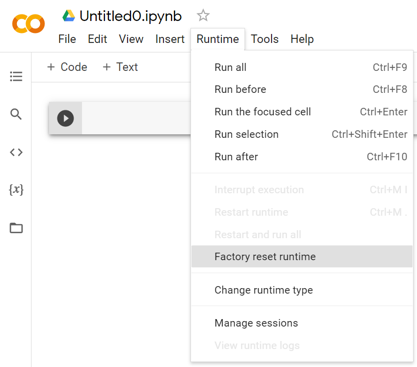

STEP 4.2: SETUP CODE FOR EXCERCISE PART 4

In [25]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

import os
import numpy as np
import random
from matplotlib import pyplot as plt

# Define training parameters
learning_rate = 0.001
training_steps = 10000
batch_size = 128

# Define network parameters
num_input = 28 # MNIST data input (img shape: 28*28)
timesteps = 28 # timesteps
num_classes = 10 # MNIST total classes (0-9 digits)

# Import MNIST dataset from tensorflow_dataset (tfds). More information about tfds can be found on https://www.tensorflow.org/datasets/api_docs/python/tfds
(ds_train, ds_test), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=False, # True
    as_supervised=True,
    with_info=True,
)

# Function to transform train and test datasets
def transform(image, label):
  """Transform images: remove last dimension of size 1"""
  """Transform images: uint8 -> float32"""
  """Transform labels: indices -> one-hots"""
  return tf.cast(tf.squeeze(image, -1), tf.float32) / 255., tf.one_hot(label, 10)

# Pre-process train dataset
ds_train = ds_train.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache() #
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(128, drop_remainder=True)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

# Pre-process test dataset
ds_test = ds_test.map(
    transform, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.cache()
ds_test = ds_test.batch(128, drop_remainder=True)
ds_test = ds_test.prefetch(tf.data.AUTOTUNE)

STEP 4.3: COPY AND MODIFY TO OBTAIN CODE USED TO BUILD COLUMN BASIC RNN MODELS

Copy the completed code in step 1.2. Below are the lines to modify.

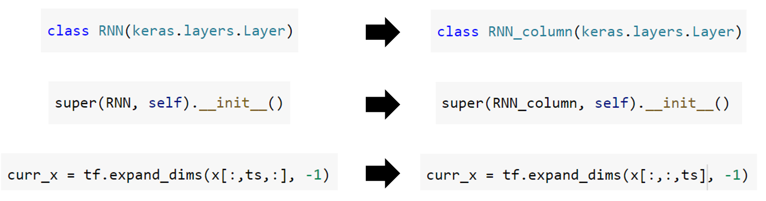

It is worth noting that the formulas are the same for Excercise Part 1 and 4. But here input at each time step is different (column versus row).

In [26]:
################################################################################
#                            START OF YOUR CODE                                #
################################################################################
class RNN_column(keras.layers.Layer):
  def __init__(self, input_dim, hidden_dim, output_dim, batch_sz):
    super(RNN_column, self).__init__()
    init = tf.random_normal_initializer()

    self.b = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,1), dtype="float32"),
        trainable=True)

    self.W = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,hidden_dim), dtype="float32"),
        trainable=True)

    self.V = tf.Variable(
        initial_value=init(shape=(1,output_dim,hidden_dim), dtype="float32"),
        trainable=True)

    ################################################################################
    # TODO:                                                                        #
    # b, W, U, d, and V are model parameters.                                      #
    # The code to initialize b, W, and V is provided above.                     #
    # Please fill in the space indicated by ***** to initialize U and d as well.         #
    # Hint: You can infer the shapes of U and d from Fig. 1.          #
    ################################################################################
    self.U = tf.Variable(
        initial_value=init(shape=(1,hidden_dim,input_dim), dtype="float32"),
        trainable=True)

    self.d = tf.Variable(
        initial_value=init(shape=(1,output_dim,1), dtype="float32"),
        trainable=True)
    ################################################################################
    #                              END OF YOUR CODE                                #
    ################################################################################

  def call(self, x, h_init, num_timestep):
    # Inputs:
    # x: [batch_sz,num_row,num_column]
    # h_init: [1,num_hidden,1]
    # num_timestep: int
    # Output:
    # y: [batch_sz,num_class], softmax normalized class probabilities

    h = h_init
    for ts in range(num_timestep):
      # curr_x: input sequence at the current timestep
      curr_x = tf.expand_dims(x[:,:,ts], -1) # [b,input_dim,1]
      ################################################################################
      # TODO:                                                                        #
      # Fill in the space indicated by ***** to implement the 1st and 2nd equations in Fig. 1 #
      # to compute activation a and hidden state h respectively.                                 #
      # You should use tf.math.tanh during implementing the 2nd equation. More information on tf.math.tanh can be found   #
      # at https://www.tensorflow.org/api_docs/python/tf/math/tanh                   #
      ################################################################################
      a = self.b + tf.linalg.matmul(self.W, h) + tf.linalg.matmul(self.U, curr_x)
      h = tf.math.tanh(a)
      ################################################################################
      #                              END OF YOUR CODE                                #
      ################################################################################

    y = self.d + tf.linalg.matmul(self.V, h)
    y =  tf.squeeze(y)
    y = tf.nn.softmax(y, axis=-1)

    return y
################################################################################
#                              END OF YOUR CODE                                #
################################################################################

STEP 4.4: CONFIGURE THE COLUMN BASIC RNN MODEL

Use the provided code to configure the column basic RNN model whose hidden states have the size of 128.

In [27]:
# Configure the column basic RNN model
basic_RNN_column = RNN_column(input_dim=num_input,
    hidden_dim=128,
    output_dim=num_classes,
    batch_sz=batch_size)

# Instantiate a tf.keras.Model for the column basic RNN model
# More information can be found at https://www.tensorflow.org/api_docs/python/tf/keras/Model
input_data = tf.keras.Input(shape=(timesteps, num_input), batch_size=batch_size,
    dtype=tf.float32)
h_init = tf.zeros([1,128,1], tf.float32)
prediction_basic_RNN_column = basic_RNN_column(input_data, h_init=h_init, num_timestep=timesteps)

model_basic_RNN_column = tf.keras.Model(input_data, prediction_basic_RNN_column)
model_basic_RNN_column.compile(optimizer='adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy'])

STEP 4.5: TRAIN THE COLUMN BASIC RNN MODEL

You should expect to see training accuracy > 90%.

In [28]:
model_basic_RNN_column.fit(ds_train, epochs=4)

Epoch 1/4
468/468 [==============================] - 23s 43ms/step - loss: 1.0655 - accuracy: 0.6511
Epoch 2/4
468/468 [==============================] - 22s 48ms/step - loss: 0.4846 - accuracy: 0.8599
Epoch 3/4
468/468 [==============================] - 21s 46ms/step - loss: 0.3405 - accuracy: 0.9028
Epoch 4/4
468/468 [==============================] - 21s 46ms/step - loss: 0.2692 - accuracy: 0.9228


STEP 4.6: TEST THE TRAINED COLUMN BASIC RNN MODEL

You should expect to see testing accuracy > or near 90%.

In [29]:
# Test trained column basic RNN model
h_init = tf.zeros([1,128,1], tf.float32)

predicted_digits = []
gt_digits = []
for input_sequences, gt_digit in ds_test:
  predicted_digit = basic_RNN_column(input_sequences, h_init=h_init, num_timestep=timesteps)

  # one-hot to index
  predicted_digits.append(np.squeeze(tf.argmax(predicted_digit, axis=-1).numpy()))
  gt_digits.append(np.squeeze(tf.argmax(gt_digit, axis=-1).numpy()))

predicted_digits = np.squeeze(np.concatenate(predicted_digits))
gt_digits = np.squeeze(np.concatenate(gt_digits))

test_accuracy = np.sum(predicted_digits == gt_digits) / np.shape(predicted_digits)[0]

print('Testing accuracy of the column basic RNN model: %f' % test_accuracy)

Testing accuracy of the column basic RNN model: 0.924880


STEP 4.7: ANSWER THE QUESTION BELOW

4.7.1: Report testing accuracy of the column basic RNN model. Should it be close to that of the 1st basic RNN model in Excercise Part 1 and why?

Your Answer: The testing accuracy of this model is 92.5%. It should be close to the first model, which was 94.5%. This is because using either row or column representations does not fundamentally change the information content of the image. Hence, the model is still able to learn and perform.

**Acknowledgement: This exercise is adapted from https://github.com/aymericdamien/TensorFlow-Examples/**